In [38]:
#import required  library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
#importing dataset
retail = pd.read_csv('/Users/pc/Downloads/Global+Superstore+Data.csv')
retail.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [41]:
retail.shape

(51290, 5)

In [42]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [43]:
retail.columns

Index(['Order Date', 'Segment', 'Market', 'Sales', 'Profit'], dtype='object')

In [44]:
retail.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


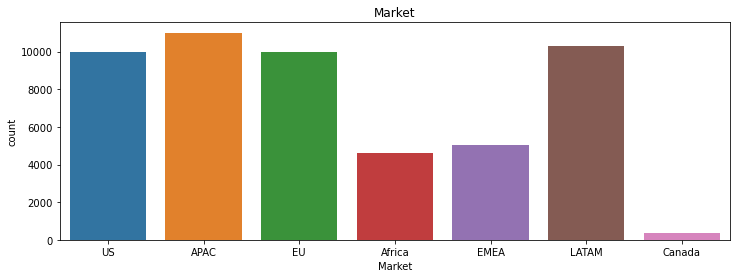

In [45]:
plt.figure(figsize =(12,4))
sns.countplot(retail.Market,data=retail)
plt.title('Market')
plt.show()

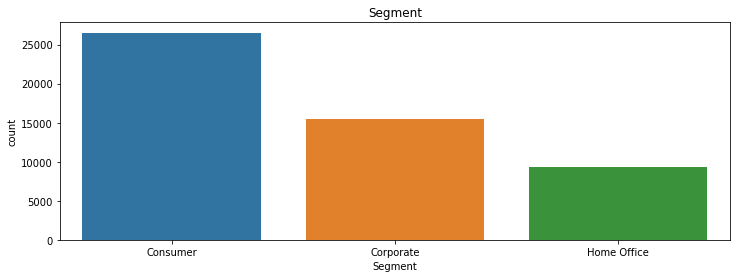

In [46]:
plt.figure(figsize =(12,4))
sns.countplot(retail.Segment,data=retail)
plt.title('Segment')
plt.show()

In [47]:
retail['Market-Segment']= retail['Segment'] + '-' + retail['Market']

In [48]:
retail.head()

,Order Date,Segment,Market,Sales,Profit,Market-Segment
0,31-07-2012,Consumer,US,2309.650,762.1845,Consumer-US
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,Corporate-APAC
2,17-10-2013,Consumer,APAC,5175.171,919.9710,Consumer-APAC
3,28-01-2013,Home Office,EU,2892.510,-96.5400,Home Office-EU
4,05-11-2013,Consumer,Africa,2832.960,311.5200,Consumer-Africa


In [49]:
retail['Date']=pd.to_datetime(retail['Order Date']).dt.to_period('m')


In [50]:
retail.columns

Index(['Order Date', 'Segment', 'Market', 'Sales', 'Profit', 'Market-Segment',
       'Date'],
      dtype='object')

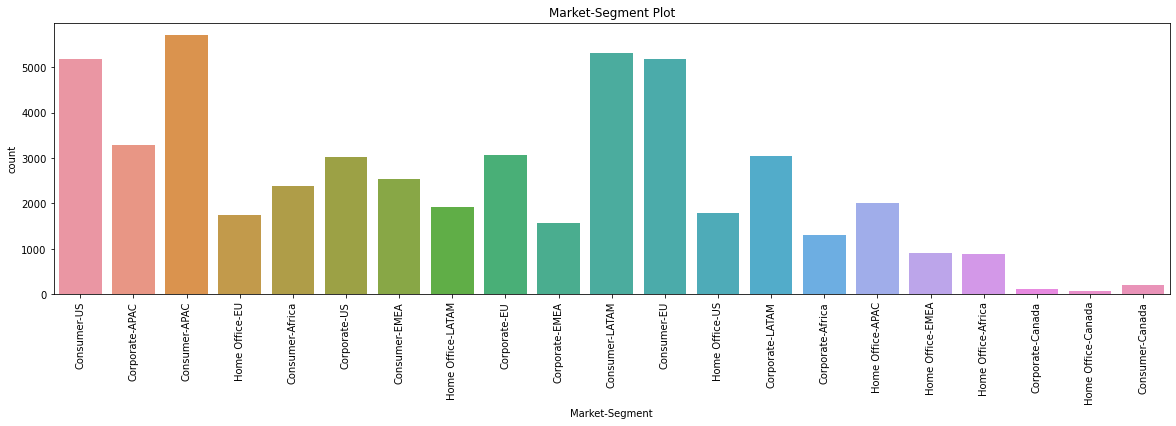

In [51]:
plt.figure(figsize=(20,5))
s1=sns.countplot(x='Market-Segment',data=retail)
plt.title('Market-Segment Plot')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Attribute Analysis

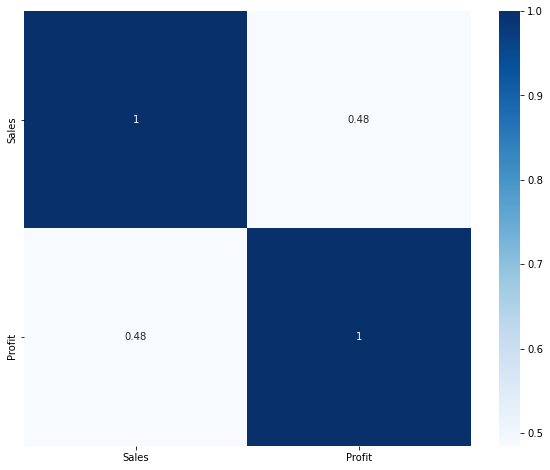

In [52]:
plt.figure(figsize=(10,8))
sns.heatmap(retail.corr(),cmap="Blues",annot=True)
plt.show()


### Bivariate Analysis

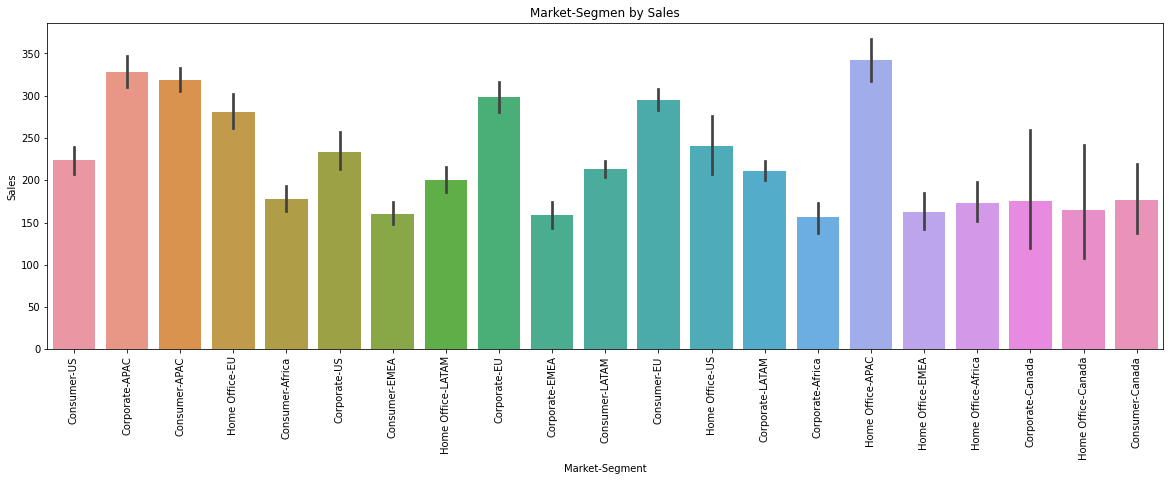

In [53]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(data=retail,x='Market-Segment',y='Sales')
plt.title("Market-Segmen by Sales")
plt.show()

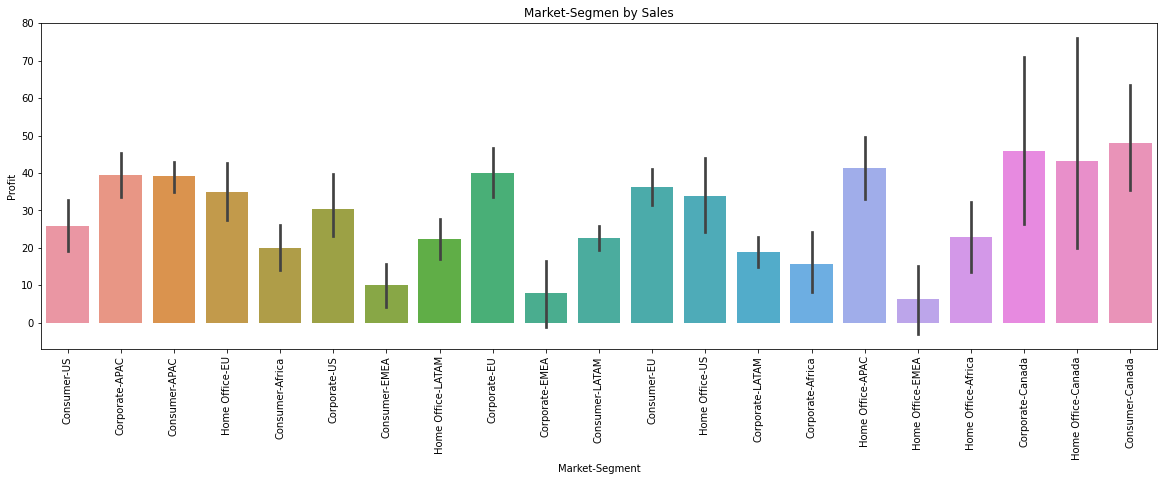

In [54]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(data=retail,x='Market-Segment',y='Profit')
plt.title("Market-Segmen by Sales")
plt.show()

### Test and Train Data Preparation

In [79]:
retail.columns

Index(['Order Date', 'Segment', 'Market', 'Sales', 'Profit', 'Market-Segment',
       'Date'],
      dtype='object')

In [144]:
stores=retail.pivot_table(index='Date',values='Profit',columns='Market-Segment',aggfunc='sum')
stores.head()

Market-Segment,Consumer-APAC,Consumer-Africa,Consumer-Canada,Consumer-EMEA,Consumer-EU,Consumer-LATAM,Consumer-US,Corporate-APAC,Corporate-Africa,Corporate-Canada,...,Corporate-EU,Corporate-LATAM,Corporate-US,Home Office-APAC,Home Office-Africa,Home Office-Canada,Home Office-EMEA,Home Office-EU,Home Office-LATAM,Home Office-US
Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,265.539,447.33,-2952.594,2259.8670,540.44312,2465.8368,-173.7264,520.026,12.57,...,841.3875,1021.05924,643.3689,230.2656,391.515,NaN,392.526,2534.568,-26.59744,1233.9329
2011-02,4627.8531,-201.888,26.43,464.160,-783.9945,1227.86616,1853.5541,3600.7776,-31.689,9.24,...,2234.4060,814.03020,421.9256,617.5407,825.606,87.99,368.070,162.255,-356.80440,553.9467
2011-03,2337.8319,919.074,82.47,706.380,1273.7100,2427.39612,204.2007,3634.9365,244.437,NaN,...,2206.5960,178.66400,127.4696,205.1052,83.430,84.03,-15.570,269.745,769.88400,-268.9314
2011-04,633.6423,381.315,55.08,121.353,2980.0065,1368.82948,1434.8636,90.7521,941.751,6.51,...,981.1470,872.64068,494.7315,603.8478,417.618,NaN,-456.510,130.371,-554.22952,2723.4358
2011-05,3838.9500,-39.981,0.87,172.554,673.0080,1749.39200,833.9433,1028.4489,490.650,NaN,...,1719.0600,134.87252,2912.7976,102.0315,39.180,NaN,-33.591,443.310,-397.95600,145.7781


In [81]:
train_len=42
train=stores[0:train_len]
test=stores[train_len:]

### Calculating Coefficient Of Variation

In [82]:
mean=np.mean(train)
std=np.std(train)
COV=std/mean
COV=pd.DataFrame(COV)
COV=COV.reset_index()
COV.columns=['Market-Segment','Consistency Market']
COV.sort_values(by='Consistency Market',ascending=True,inplace=True)
COV


,Market-Segment,Consistency Market
0,Consumer-APAC,0.522725
7,Corporate-APAC,0.530051
4,Consumer-EU,0.595215
5,Consumer-LATAM,0.683770
11,Corporate-EU,0.722076
12,Corporate-LATAM,0.882177
18,Home Office-EU,0.938072
14,Home Office-APAC,1.008219
6,Consumer-US,1.010530
13,Corporate-US,1.071829


#### We can see that the Consumer-APAC market is the most consistent market having the lowest coefficient of variation. Hence we will analyse this market and leave all the rest.

In [83]:
APAC=retail[retail['Market-Segment']=='Consumer-APAC']
APAC=APAC.drop('Order Date',axis=1)
APAC.head()


,Segment,Market,Sales,Profit,Market-Segment,Date
2,Consumer,APAC,5175.171,919.971,Consumer-APAC,2013-10
6,Consumer,APAC,1822.080,564.840,Consumer-APAC,2011-07
7,Consumer,APAC,5244.840,996.480,Consumer-APAC,2012-04
14,Consumer,APAC,3701.520,1036.080,Consumer-APAC,2013-06
29,Consumer,APAC,1878.720,582.360,Consumer-APAC,2012-02


In [84]:
APAC.shape

(5699, 6)

In [85]:
APAC.describe()

,Sales,Profit
count,5699.000000,5699.000000
mean,318.784646,39.097659
std,540.272454,164.472190
min,2.880000,-2380.350000
25%,46.542600,-2.877600
50%,121.920000,10.800000
75%,341.898300,46.800000
max,5759.964000,2817.990000


In [86]:
APAC.columns

Index(['Segment', 'Market', 'Sales', 'Profit', 'Market-Segment', 'Date'], dtype='object')

In [87]:
APAC['Date'] = APAC['Date'].astype(str)

In [89]:
APAC = APAC.groupby('Date')['Sales'].sum()



APAC = pd.DataFrame(APAC) 
APAC = APAC.reset_index()

APAC['Date'] = pd.to_datetime(APAC['Date'] ) 
APAC = APAC.set_index('Date')
APAC = APAC.sort_values(by = 'Date', ascending = True) 

In [90]:
APAC.shape

(48, 1)

### Decompose the time series

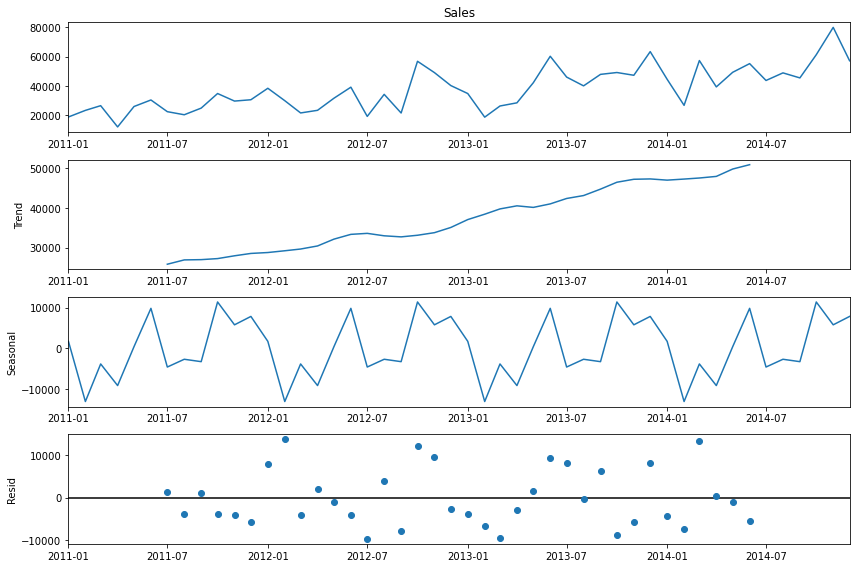

In [91]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(APAC.Sales, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

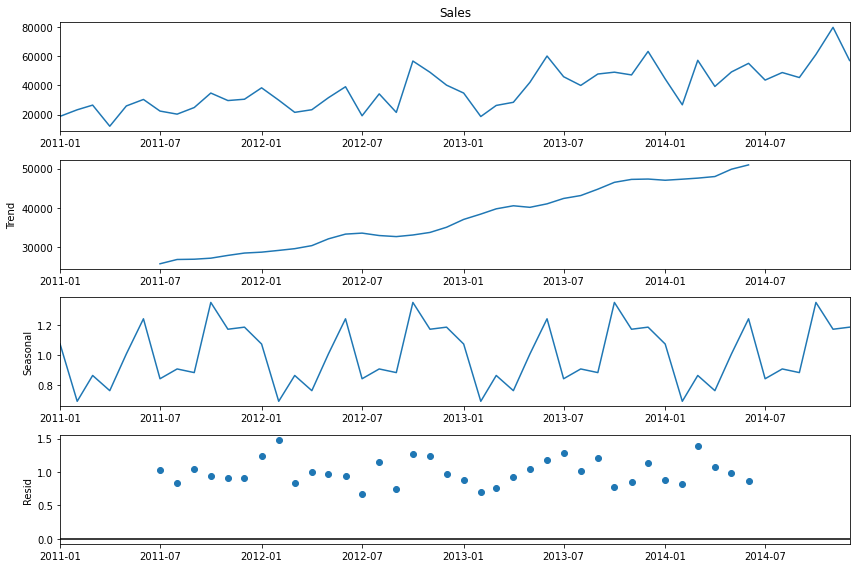

In [92]:
decomposition = sm.tsa.seasonal_decompose(APAC.Sales, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

### Splitting the time series data into train and test split

In [93]:
train_len=42
train=APAC[0:train_len]
test=APAC[train_len:]

## Naive Method

In [94]:
y_hat_naive=test.copy()
y_hat_naive['naive_forecast']=train['Sales'][train_len-1]

## Plot, train ,test and forecast

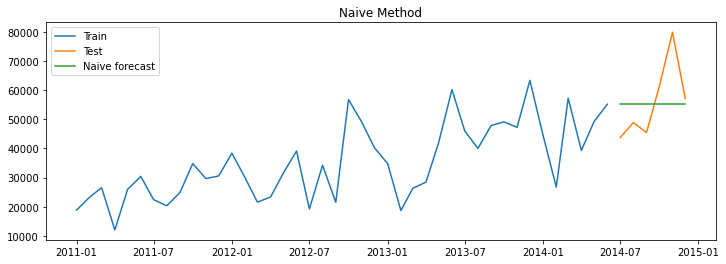

In [95]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculate RMSE and MAPE

In [96]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['naive_forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47


### Simple Average Model

In [97]:
y_hat_avg=test.copy()
y_hat_avg['avg_forecast']=train['Sales'].mean()


## Plot, train ,test and forecast

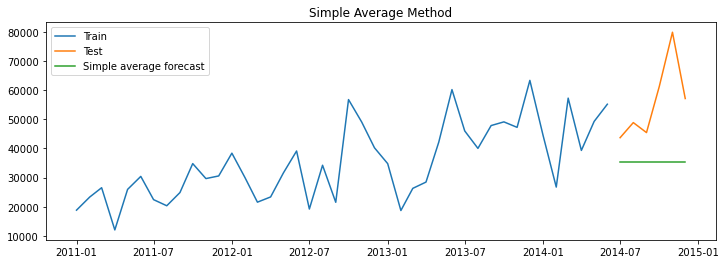

In [98]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

### Calculate RMSE and MAPE

In [99]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['avg_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results


,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34


### Simple Moving Average 12 months

In [100]:
y_hat_sma = APAC.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = APAC['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

### Plot train,test and forecast

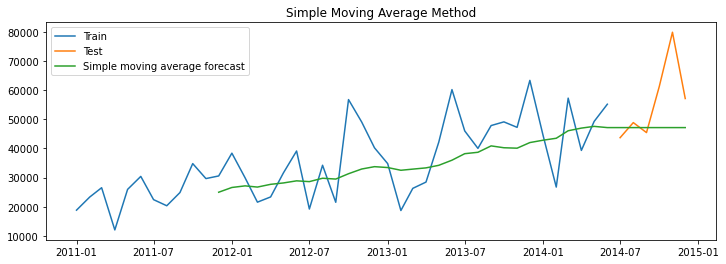

In [101]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [102]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10


### Simple Exponential Smoothing

In [103]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)
print(model_fit.params)

{'smoothing_level': 0.2, 'smoothing_trend': None, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 18821.989799999996, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/pc/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


### Plot train,test and forecast

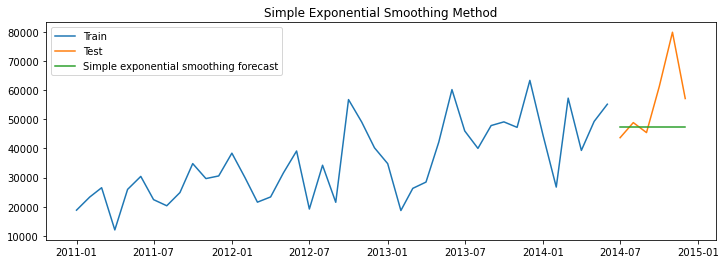

In [104]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

### Calculate RMSE and MAPE

In [105]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10
0,Simple exponential smoothing forecast,15011.49,15.99


### Holt's Method with trend

In [106]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 18821.989799999996, 'initial_trend': 4491.3633000000045, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast 

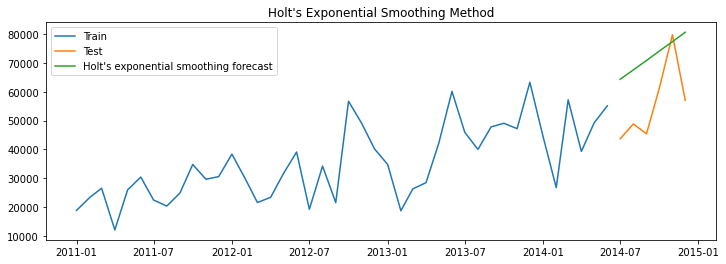

In [107]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculate RSME and MAPE 

In [108]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57


### Holt Winters' additive method with trend and seasonality

In [109]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.07571428571428572, 'smoothing_trend': 0.010816326530612248, 'smoothing_seasonal': 0.1026984126984127, 'damping_trend': nan, 'initial_level': 34110.965325000005, 'initial_trend': 730.4167145833339, 'initial_seasons': array([-15288.975525, -10797.612225,  -7592.473425, -22064.873025,
        -8169.065325,  -3712.033725, -11679.370425, -13779.891825,
        -9250.570425,    676.322775,  -4462.610625,  -3556.103925]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/pc/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Plot train, test and forecast 

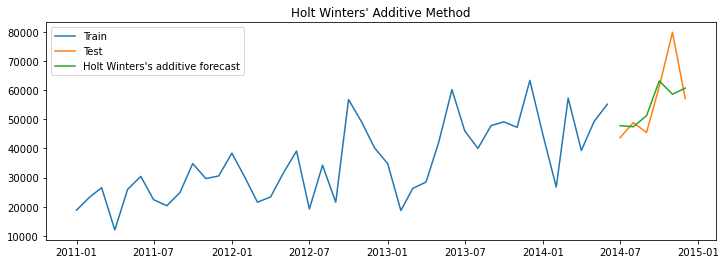

In [110]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### Calculate RMSE and MAPE

In [111]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17


### Holt Winter's multiplicative method with trend and seasonality 

In [112]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.040357142857142855, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.13709183673469388, 'damping_trend': nan, 'initial_level': 34110.965325000005, 'initial_trend': 730.4167145833339, 'initial_seasons': array([0.55178708, 0.68345627, 0.77741839, 0.35314428, 0.76051498,
       0.8911777 , 0.65760657, 0.5960275 , 0.72880948, 1.01982714,
       0.86917372, 0.89574895]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/pc/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Plot train, test and forecast 

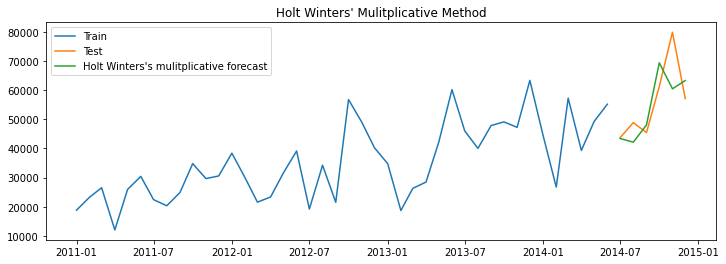

In [113]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

### Calculate RMSE and MAPE

In [114]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43


### The best method for the model building in the smoothing techniques is Holt's Winter additive since the seasonal variation is constant over time. Also it has lowest MAPE value which evaluates our hypothesis. 

### Auto Regressive methods

### Stationarity vs non-stationary time series 

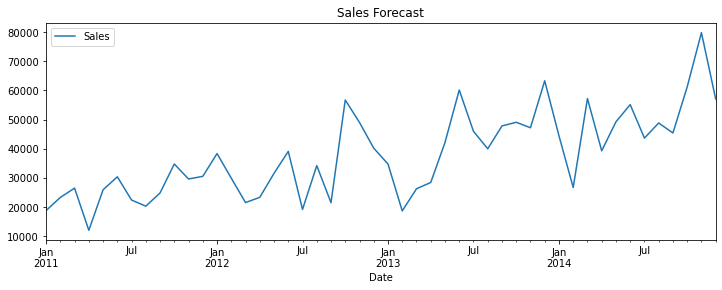

In [115]:
APAC['Sales'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Sales Forecast')
plt.show(block=False)

### ADF Test

In [116]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(APAC['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.376024
Critical Values @ 0.05: -2.93
p-value: 0.011804


### KPSS Test

In [117]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(APAC['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.577076
Critical Values @ 0.05: 0.46
p-value: 0.024720


### Box Cox Transformation to make variance constant

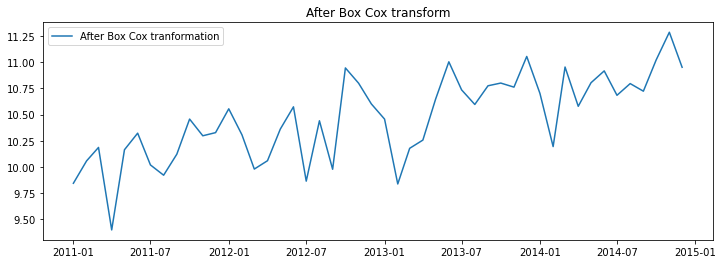

In [118]:
from scipy.stats import boxcox
APAC_boxcox = pd.Series(boxcox(APAC['Sales'], lmbda=0), index = APAC.index)

plt.figure(figsize=(12,4))
plt.plot(APAC_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing to remove trend

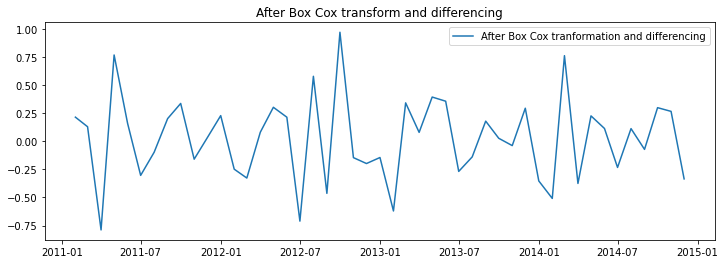

In [119]:
APAC_boxcox_diff = pd.Series(APAC_boxcox - APAC_boxcox.shift(), APAC.index)
plt.figure(figsize=(12,4))
plt.plot(APAC_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [120]:
APAC_boxcox_diff.dropna(inplace=True)

### ADF Test

In [121]:
adf_test = adfuller(APAC_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.535011
Critical Values @ 0.05: -2.95
p-value: 0.000170


In [122]:
kpss_test = kpss(APAC_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.156456
Critical Values @ 0.05: 0.46
p-value: 0.100000


/Users/pc/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [123]:
train_APAC_boxcox = APAC_boxcox[:train_len]
test_APAC_boxcox = APAC_boxcox[train_len:]
train_APAC_boxcox_diff = APAC_boxcox_diff[:train_len-1]
test_APAC_boxcox_diff = APAC_boxcox_diff[train_len-1:]

### Auto Regression Method(AR)

In [124]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_APAC_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.024255
ar.L1.y   -0.406729
dtype: float64


/Users/pc/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


### Recover original time series

In [125]:
y_hat_ar = APAC_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(APAC_boxcox_diff.index.min(), APAC_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(APAC_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### Plot train, test and forecast 

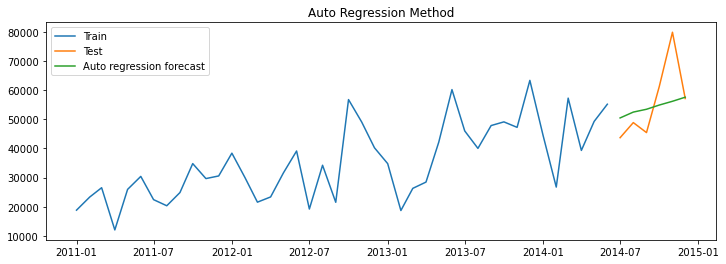

In [126]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

### Calculate RMSE and MAPE

In [127]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56


### Moving average method (MA) 

In [128]:
model = ARIMA(train_APAC_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.021415
ma.L1.y   -1.000000
dtype: float64


/Users/pc/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


### Recover original time series 

In [129]:
y_hat_ma = APAC_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(APAC_boxcox_diff.index.min(), APAC_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(APAC_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

### Plot train, test and forecast 

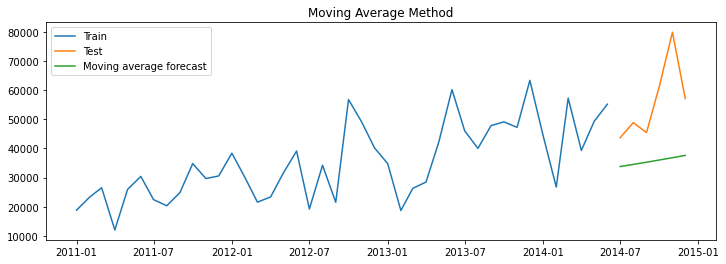

In [130]:
plt.figure(figsize=(12,4))
plt.plot(APAC['Sales'][:train_len], label='Train')
plt.plot(APAC['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

### Calculate RMSE and MAPE 

In [131]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93


### Auto regression moving average method (ARMA)

In [132]:
model = ARIMA(train_APAC_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.02147
ar.L1.y    0.07458
ma.L1.y   -1.00000
dtype: float64


/Users/pc/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


### Recover original time series 

In [133]:
y_hat_arma = APAC_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(APAC_boxcox_diff.index.min(), APAC_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(APAC_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

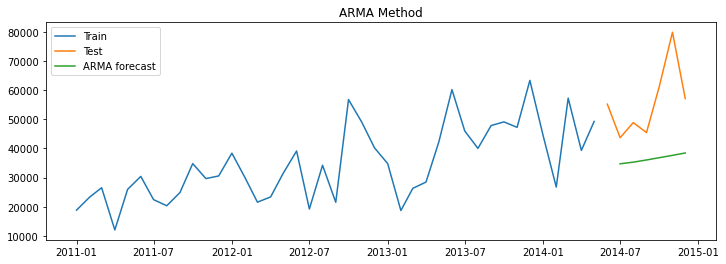

In [134]:
plt.figure(figsize=(12,4))
plt.plot(APAC['Sales'][:train_len-1], label='Train')
plt.plot(APAC['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

### Calculate RMSE and MAPE 

In [135]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


### Auto regressive integrated moving average (ARIMA)

In [136]:
model = ARIMA(train_APAC_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


/Users/pc/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/pc/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


### Recover original time series forecast

In [137]:
y_hat_arima = APAC_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(APAC_boxcox_diff.index.min(), APAC_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(APAC_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

### Plot train, test and forecast 

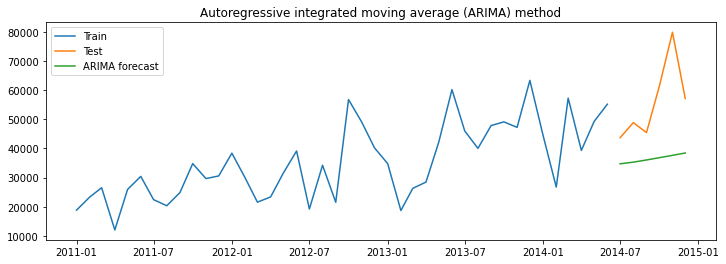

In [138]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

### Calculate RMSE and MAPE 

In [139]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


### Seasonal auto regressive integrated moving average (SARIMA)

In [140]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_APAC_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

/Users/pc/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/pc/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ar.L1      -0.041790
ma.L1      -0.996408
ar.S.L12    0.099138
ma.S.L12   -0.963083
sigma2      0.058756
dtype: float64


### Recover original time series forecast 

In [141]:
y_hat_sarima = APAC_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(APAC_boxcox_diff.index.min(), APAC_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

### Plot train, test and forecast 

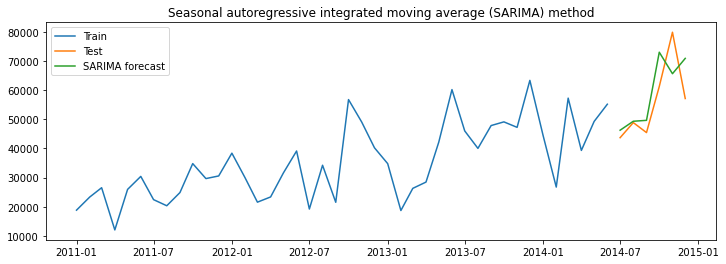

In [142]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

### Calculate RMSE and MAPE 

In [143]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


### The best method for in the Auto Regressive methods is the SARIMA methods since it includes the seasonality as well as the trend in the data. 